In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from qiskit import execute
from qiskit.visualization import plot_histogram
import matplotlib 

In [2]:
def balance1(qc1): 
    qc1.i(1)
    qc1.cx(0, 1)
    qc1.barrier()
    return qc1

def balance2(qc1): 
    qc1.x(1)
    qc1.cx(0, 1)
    qc1.barrier()
    return qc1

def const1(qc1): #f(x) = 1
    qc1.x(1)
    qc1.barrier()
    return qc1

def const2(qc1): #f(x) = 0
    qc1.i(1)
    qc1.barrier()
    return qc1

In [3]:
def deutsch(function):
    qr1 = QuantumRegister(2) #2 qubits
    cr1 = ClassicalRegister(1) #1 classical register
    qc = QuantumCircuit(qr1, cr1) #quantum circuit
    
    qc.x(1) #initial state
    qc.barrier() #barrier to separate the circuit phases
    
    qc.h(0) #hadamard gate for superposition
    qc.h(1) #hadamard gate
    qc.barrier()
    
    U = function(qc) #oracle (U) function
    
    U.h(0) #hadamard gate again
    U.barrier()
    
    U.measure(qr1[0], cr1) #measuring the result
    
    return U
    

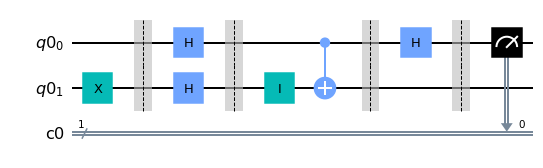

In [4]:
result1 = deutsch(balance1)
result1.draw(output='mpl')

In [5]:
#QasmSimulator to mimic an actual device, which executes a Qiskit QuantumCircuit
back = BasicAer.get_backend('qasm_simulator')
shots = 1024

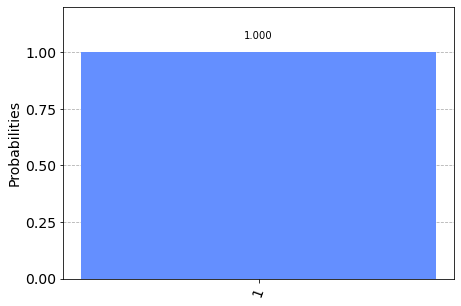

In [6]:
#check whether the input is balanced when f(x) = 0
answer1 = execute(result1, backend = back, shots=shots).result()
answer1 = answer1.get_counts()
plot_histogram(answer1)

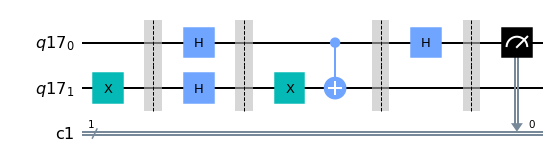

In [7]:
result2 = deutsch(balance2)
result2.draw(output='mpl')

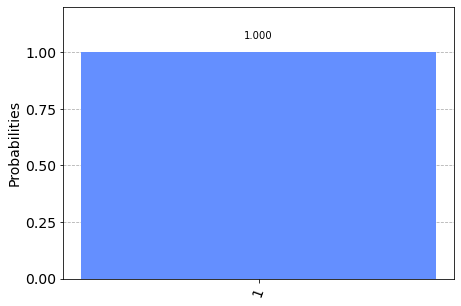

In [8]:
answer2 = execute(result2, backend = back, shots=shots).result()
answer2 = answer2.get_counts()
plot_histogram(answer2)

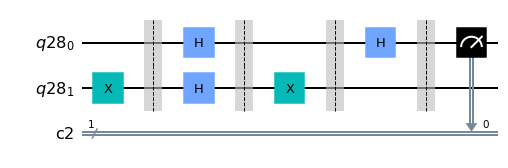

In [9]:
result3 = deutsch(const1)
result3.draw(output='mpl')

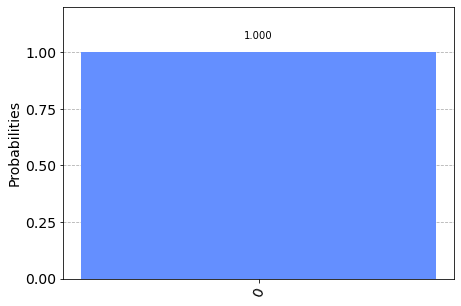

In [10]:
answer3 = execute(result3, backend = back, shots=shots).result()
answer3 = answer3.get_counts()
plot_histogram(answer3)

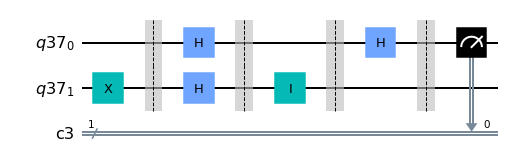

In [11]:
result4 = deutsch(const2)
result4.draw(output='mpl')

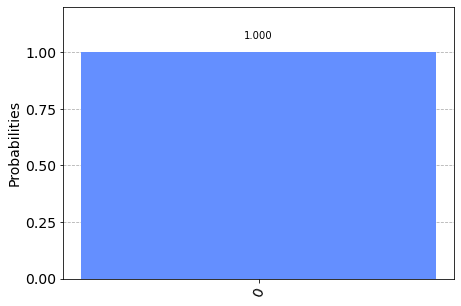

In [12]:
answer4 = execute(result4, backend = back, shots=shots).result()
answer4 = answer4.get_counts()
plot_histogram(answer4)